In [33]:
import pandas as pd

test_df = pd.read_csv('./archive/test.csv')
train_df = pd.read_csv('./archive/train.csv')

### 데이터 전처리
1. 결측값 처리 

2. 중복값 확인

3. 데이터 타입 변경

4. 불필요한 변수 삭제 및 변수 명 변경

5. 범주형 데이터 처리 'Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'

6. 이상치 처리


#### 1. 결측값 처리 필요 'Arrival Delay in Minutes'

In [34]:
missing_values_test = test_df.isnull().sum()
missing_values_train = train_df.isnull().sum()

In [35]:
missing_values_test

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [36]:
missing_values_train

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [37]:
# arrival delay가 0이 아닌 데이터들 중 satisfaction의 빈도 분석
delayed_flights_train = train_df[train_df['Arrival Delay in Minutes'] > 0]
delayed_flights_test = test_df[test_df['Arrival Delay in Minutes'] > 0]

satisfaction_frequency_train = delayed_flights_train['satisfaction'].value_counts(normalize=True) * 100
satisfaction_frequency_test = delayed_flights_test['satisfaction'].value_counts(normalize=True) * 100

(satisfaction_frequency_train, satisfaction_frequency_test)


(satisfaction
 neutral or dissatisfied    61.703533
 satisfied                  38.296467
 Name: proportion, dtype: float64,
 satisfaction
 neutral or dissatisfied    61.30631
 satisfied                  38.69369
 Name: proportion, dtype: float64)

지연된 항공편에 대한 승객의 만족도가 높지 않음을 나타내며, 지연이 승객의 전반적인 만족도에 부정적인 영향을 미칠 수 있음

그러므로 결측값을 채울 때 빈도수,중앙값,평균으로 하기보단 다른 방법을 고려

K-최근접 이웃(K-Nearest Neighbors, KNN) 알고리즘: 유사한 기록을 가진 다른 데이터 포인트들을 찾아서, 그 유사한 데이터 포인트들의 'Arrival Delay in Minutes' 값을 평균내어 누락된 값을 추정


K-최근접 이웃(K-Nearest Neighbors, KNN) 작동 과정:

특성 선택: 누락된 값을 가진 'Arrival Delay in Minutes'를 예측하기 위해 다른 특성(열)을 선택해야 합니다. 이 특성들은 도착 지연 시간과 상관관계가 있거나 도착 지연에 영향을 미칠 수 있는 변수들입니다.

유사성 측정: KNN은 유사성을 기반으로 작동합니다. 선택한 특성을 기준으로 각 데이터 포인트 간의 거리를 계산하여 가장 가까운 'k'개의 이웃을 찾습니다. 거리 측정에는 일반적으로 유클리디언 거리가 사용됩니다.

이웃 찾기: 각 누락된 값에 대해, 알고리즘은 전체 데이터셋에서 가장 유사한 'k'개의 데이터 포인트(이웃)를 찾습니다.

값 대체: 이웃들의 'Arrival Delay in Minutes' 값의 평균을 계산하여 누락된 값에 대체합니다. 'k'의 값을 선택하는 것은 매우 중요한데, 너무 작으면 노이즈에 민감해지고, 너무 크면 유사성이 낮은 이웃들까지 고려하게 되어 대체값의 정확성이 떨어질 수 있습니다.

KNN을 사용하는 이점은 모델이 데이터의 지역적 패턴을 반영할 수 있다는 점입니다. 즉, 비슷한 조건을 가진 다른 승객의 지연 시간을 기반으로 누락된 값을 추정하는 것이므로, 실제와 비슷한 값을 추정할 가능성이 높아집니다.

In [38]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=5) 
# n_neighbors 다른값 설정 가능

# 누락된 값을 대체하기 위해 사용하고자 하는 수치 특성만을 포함하는 새로운 데이터프레임을 생성합니다.
numeric_features = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

train_numeric = train_df[numeric_features]
test_numeric = test_df[numeric_features]

#누락된 값 대체
train_df_imputed = knn_imputer.fit_transform(train_numeric)
test_df_imputed = knn_imputer.transform(test_numeric)

train_df[numeric_features] = train_df_imputed
test_df[numeric_features] = test_df_imputed

missing_values_after_imputation_train = pd.isnull(train_df).sum()
missing_values_after_imputation_test = pd.isnull(test_df).sum()

(missing_values_after_imputation_train, missing_values_after_imputation_test)


(Unnamed: 0                           0
 id                                   0
 Gender                               0
 Customer Type                        0
 Age                                  0
 Type of Travel                       0
 Class                                0
 Flight Distance                      0
 Inflight wifi service                0
 Departure/Arrival time convenient    0
 Ease of Online booking               0
 Gate location                        0
 Food and drink                       0
 Online boarding                      0
 Seat comfort                         0
 Inflight entertainment               0
 On-board service                     0
 Leg room service                     0
 Baggage handling                     0
 Checkin service                      0
 Inflight service                     0
 Cleanliness                          0
 Departure Delay in Minutes           0
 Arrival Delay in Minutes             0
 satisfaction                         0


#### 2. 중복값 확인

In [39]:
duplicate_rows_train = train_df.duplicated().sum()
duplicate_rows_test = test_df.duplicated().sum()

duplicate_rows_train, duplicate_rows_test


(0, 0)

중복값 없음 확인

#### 3. 데이터 타입 변경

In [40]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  float64
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [42]:
train_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = train_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].astype(int)
test_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']] = test_df[['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']].astype(int)

#### 4. 불필요한 변수 삭제 및 변수명 변경

In [43]:
# Unnamed: 0 열 삭제
train_df.drop('Unnamed: 0', axis=1, inplace=True)
test_df.drop('Unnamed: 0' , axis=1, inplace=True)

# id 열 삭제
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [44]:
column_rename_mapping = {
    'On-board service' : 'on_board_service',
    'Age' : 'age',
    'Gender' : 'gender',
    'Customer Type' : 'customer_type',
    'Type of Travel' : 'type_travel',
    'Class' : 'class',
    'Flight Distance' : 'flight_distance',
    'Gate location' : 'gate_location',
    'Online boarding':  'online_boarding',
    'Seat comfort' : 'seat_comfort',
    'Leg room service' : 'leg_service',
    'Baggage handling' : 'baggage_handle',
    'Checkin service' : 'checkin_service',
    'Inflight service': 'inflight_service',
    'Cleanliness' : 'cleanliness',
    'Inflight wifi service': 'wifi_service',
    'Departure/Arrival time convenient': 'time_convenient',
    'Ease of Online booking': 'booking',
    'Food and drink': 'food',
    'Inflight entertainment': 'entertainment',
    'Departure Delay in Minutes': 'departure_delay',
    'Arrival Delay in Minutes': 'arrival_delay'
}

train_df.rename(columns=column_rename_mapping, inplace=True)
test_df.rename(columns=column_rename_mapping, inplace=True)

renamed_columns_train = train_df.columns
renamed_columns_test = test_df.columns

(renamed_columns_train, renamed_columns_test)


(Index(['gender', 'customer_type', 'age', 'type_travel', 'class',
        'flight_distance', 'wifi_service', 'time_convenient', 'booking',
        'gate_location', 'food', 'online_boarding', 'seat_comfort',
        'entertainment', 'on_board_service', 'leg_service', 'baggage_handle',
        'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay',
        'arrival_delay', 'satisfaction'],
       dtype='object'),
 Index(['gender', 'customer_type', 'age', 'type_travel', 'class',
        'flight_distance', 'wifi_service', 'time_convenient', 'booking',
        'gate_location', 'food', 'online_boarding', 'seat_comfort',
        'entertainment', 'on_board_service', 'leg_service', 'baggage_handle',
        'checkin_service', 'inflight_service', 'cleanliness', 'departure_delay',
        'arrival_delay', 'satisfaction'],
       dtype='object'))

#### 5. 범주형 데이터 처리 'class', 'gender', 'customer_tyoe', 'tyoe_travel', 'satisfaction'

'class' 순서형 인코딩 (등급이므로)

In [45]:
from sklearn.preprocessing import OrdinalEncoder
# 'Eco'를 0, 'Eco Plus'를 1, 'Business'를 2로 할당
class_order = ['Eco', 'Eco Plus', 'Business']

ordinal_encoder = OrdinalEncoder(categories=[class_order])

train_df['class'] = ordinal_encoder.fit_transform(train_df[['class']])
test_df['class'] = ordinal_encoder.transform(test_df[['class']])

encoded_class_train = train_df[['class']].head()
encoded_class_test = test_df[['class']].head()

(encoded_class_train, encoded_class_test)


(   class
 0    1.0
 1    2.0
 2    2.0
 3    2.0
 4    2.0,
    class
 0    0.0
 1    2.0
 2    0.0
 3    2.0
 4    0.0)

'gender' 레이블 인코딩 male : 0, female : 1

In [46]:
train_df['gender'] = train_df['gender'].astype('category')
test_df['gender'] = test_df['gender'].astype('category')

train_df['gender'] = train_df['gender'].cat.codes
test_df['gender'] = test_df['gender'].cat.codes


encoded_gender_train = train_df['gender'].head()
encoded_gender_test = test_df['gender'].head()

(encoded_gender_train, encoded_gender_test)


(0    1
 1    1
 2    0
 3    0
 4    1
 Name: gender, dtype: int8,
 0    0
 1    0
 2    1
 3    1
 4    0
 Name: gender, dtype: int8)

customer_type 레이블 인코딩 '0'은 'Loyal Customer', '1'은 'disloyal Customer'

In [47]:
train_df['customer_type'] = train_df['customer_type'].astype('category')
test_df['customer_type'] = test_df['customer_type'].astype('category')

train_df['customer_type'] = train_df['customer_type'].cat.codes
test_df['customer_type'] = test_df['customer_type'].cat.codes


encoded_customer_type_train = train_df['customer_type'].head()
encoded_customer_type_test = test_df['customer_type'].head()

(encoded_customer_type_train, encoded_customer_type_test)

(0    0
 1    1
 2    0
 3    0
 4    0
 Name: customer_type, dtype: int8,
 0    0
 1    0
 2    1
 3    0
 4    0
 Name: customer_type, dtype: int8)

type_travel 레이블 인코딩  '0'은 'Business travel', '1'은 'Personal Travel'

In [48]:
train_df['type_travel'] = train_df['type_travel'].astype('category')
test_df['type_travel'] = test_df['type_travel'].astype('category')

train_df['type_travel'] = train_df['type_travel'].cat.codes
test_df['type_travel'] = test_df['type_travel'].cat.codes

# Display the encoded values for 'Type of Travel'
encoded_type_travel_train = train_df['type_travel'].head()
encoded_type_travel_test = test_df['type_travel'].head()

(encoded_type_travel_train, encoded_type_travel_test)


(0    1
 1    0
 2    0
 3    0
 4    0
 Name: type_travel, dtype: int8,
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: type_travel, dtype: int8)

staisfaction 인코딩

In [49]:
# 한번만 실행
satisfaction_mapping = {'satisfied': 1, 'neutral or dissatisfied': 0}
train_df['satisfaction'] = train_df['satisfaction'].map(satisfaction_mapping)
test_df['satisfaction'] = test_df['satisfaction'].map(satisfaction_mapping)
test_df[['satisfaction']].head()


,satisfaction
0,1
1,1
2,0
3,1
4,1


#### 6. 이상치 처리

z score 가 3 이상인 데이터들 확인

In [50]:
from scipy import stats
import numpy as np

numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
z_scores = np.abs(stats.zscore(train_df[numerical_cols]))
outliers = (z_scores > 3).sum()
outliers


gender                 0
customer_type          0
age                   17
type_travel            0
class                  0
flight_distance       58
wifi_service           0
time_convenient        0
booking                0
gate_location          0
food                   0
online_boarding        0
seat_comfort           0
entertainment          0
on_board_service       0
leg_service            0
baggage_handle         0
checkin_service        0
inflight_service       3
cleanliness            0
departure_delay     2222
arrival_delay       2251
satisfaction           0
dtype: int64

1. age 같은 경우 7-85세로 있으므로 이상치로 고려 할 필요 X
2. flight_distance 4230 이상인 데이터를 이상치로 고려  
3. inflight_service 에 0인 데이터가 있음  
4. departure, arrival dealay 따로 확인 필요  

    2.flight_distance 시각화

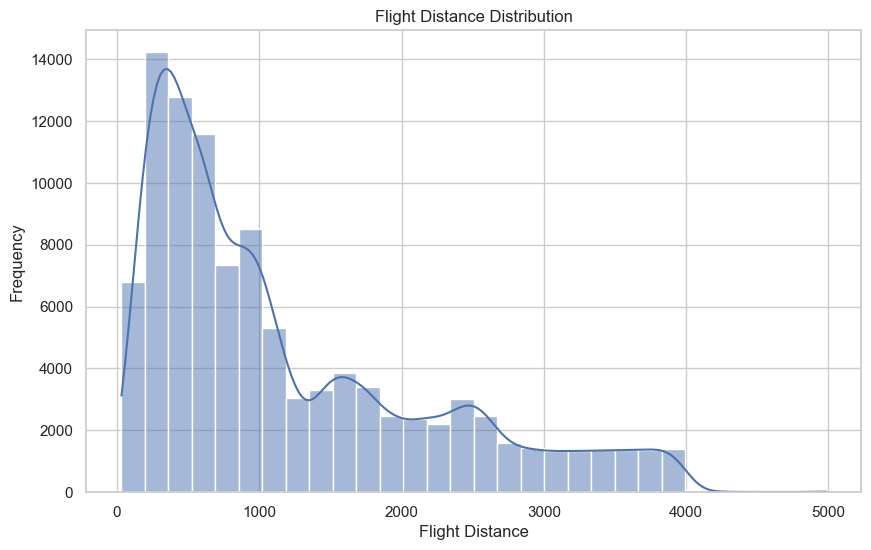

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(train_df['flight_distance'], bins=30, kde=True)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

flight_distance 4230 이상인 데이터(58개) 따로 처리 필요

    비행거리 범위에 따른 순서형 인코딩

    단거리 비행 (Short-haul): 보통 500 mile(약 800 km) 이하의 비행 -> 1  
    중거리 비행 (Medium-haul): 대략 500-1500 mile(약 800-2400 km) 사이의 비행 -> 2  
    장거리 비행 (Long-haul): 일반적으로 1500 mile (약 2400 km) 이상의 비행 -> 3

In [52]:
# train_df
train_df.loc[train_df['flight_distance'] <= 500, 'flight_distance'] = 1
train_df.loc[(train_df['flight_distance'] > 500) & (train_df['flight_distance'] <= 1500), 'flight_distance'] = 2
train_df.loc[train_df['flight_distance'] > 1500, 'flight_distance'] = 3

test_df.loc[test_df['flight_distance'] <= 500, 'flight_distance'] = 1
test_df.loc[(test_df['flight_distance'] > 500) & (test_df['flight_distance'] <= 1500), 'flight_distance'] = 2
test_df.loc[test_df['flight_distance'] > 1500, 'flight_distance'] = 3

    3. inflight_service 0인 데이터 단순 데이터 오류라 볼 수 있음
     제거해도 무방하나 knn 알고리즘으로 채우기

In [53]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

inflight_zero_indices = train_df[train_df['inflight_service'] == 0].index

features = train_df.columns.difference(['inflight_service'])
features_data = train_df[features]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_data)

nn_model = NearestNeighbors(n_neighbors=5)
nn_model.fit(features_scaled)

neighbors = nn_model.kneighbors(features_scaled[inflight_zero_indices], return_distance=False)

inflight_service_replacements = train_df.iloc[neighbors.flatten()]['inflight_service']

average_inflight_service = inflight_service_replacements.values.reshape(-1, 5).mean(axis=1)

original_and_replacements = pd.DataFrame({
    'Original Inflight Service': train_df.loc[inflight_zero_indices, 'inflight_service'],
    'Replacement Inflight Service': average_inflight_service
})

original_and_replacements


,Original Inflight Service,Replacement Inflight Service
466,0,0.8
51397,0,0.8
88714,0,0.8


inflight_service :1,2,3,4,5 로 구성 되어있으므로 0.8 -> 1로 

In [54]:
train_df['inflight_service'] = train_df['inflight_service'].replace(0.8, 1)

    4. departure, arrival delay 시각화

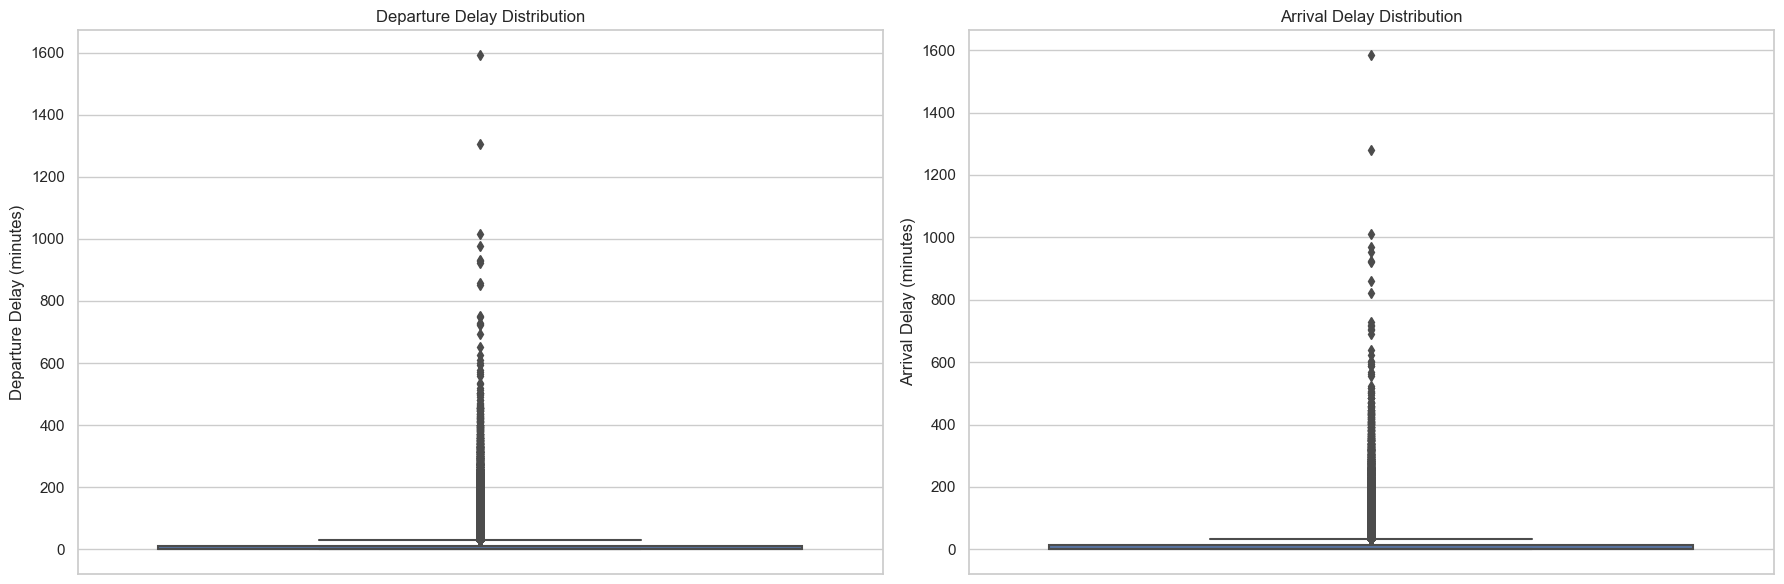

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Departure Delay
sns.boxplot(y=train_df['departure_delay'], ax=ax[0])
ax[0].set_title('Departure Delay Distribution')
ax[0].set_ylabel('Departure Delay (minutes)')

# Arrival Delay
sns.boxplot(y=train_df['arrival_delay'], ax=ax[1])
ax[1].set_title('Arrival Delay Distribution')
ax[1].set_ylabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()


    연착 시간에 따른 순서형 인코딩  
    
    delay
    0-60 min    -> 1.1   
    60-120 min  -> 1.2   
    120-180 min -> 1.3  
    180-360 min -> 2   
    360+ min    -> 3   

In [56]:
# train_df

# departure_delay
train_df.loc[train_df['departure_delay'] <= 60,'departure_delay'] = 1.1
train_df.loc[(train_df['departure_delay'] > 60) & (train_df['departure_delay'] <= 120),'departure_delay'] = 1.2
train_df.loc[(train_df['departure_delay'] > 120) & (train_df['departure_delay'] <= 180),'departure_delay'] = 1.3
train_df.loc[(train_df['departure_delay'] > 180) & (train_df['departure_delay'] <= 360),'departure_delay'] = 2
train_df.loc[train_df['departure_delay'] > 360,'departure_delay'] = 3

# arrival_delay
train_df.loc[train_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1
train_df.loc[(train_df['arrival_delay'] > 60) & (train_df['arrival_delay'] <= 120),'arrival_delay'] = 1.2
train_df.loc[(train_df['arrival_delay'] > 120) & (train_df['arrival_delay'] <= 180),'arrival_delay'] = 1.3
train_df.loc[(train_df['arrival_delay'] > 180) & (train_df['arrival_delay'] <= 360),'arrival_delay'] = 2
train_df.loc[train_df['arrival_delay'] > 360,'arrival_delay'] = 3

train_df

,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,time_convenient,booking,gate_location,...,entertainment,on_board_service,leg_service,baggage_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,1,0,13,1,1.0,1,3,4,3,1,...,5,4,3,4,4,5,5,1.1,1.1,0
1,1,1,25,0,2.0,1,3,2,3,3,...,1,1,5,3,1,4,1,1.1,1.1,0
2,0,0,26,0,2.0,2,2,2,2,2,...,5,4,3,4,4,4,5,1.1,1.1,1
3,0,0,25,0,2.0,2,2,5,5,5,...,2,2,5,3,1,4,2,1.1,1.1,0
4,1,0,61,0,2.0,1,3,3,3,3,...,3,3,4,4,3,3,3,1.1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,0.0,1,2,1,2,3,...,2,3,1,4,2,3,2,1.1,1.1,0
103900,1,0,49,0,2.0,3,4,4,4,4,...,5,5,5,5,5,5,4,1.1,1.1,1
103901,1,1,30,0,2.0,3,1,1,1,3,...,4,3,2,4,5,5,4,1.1,1.1,0
103902,0,1,22,0,0.0,2,1,1,1,5,...,1,4,5,1,5,4,1,1.1,1.1,0


In [57]:
# test_df

# departure_delay
test_df.loc[test_df['departure_delay'] <= 60,'departure_delay'] = 1.1
test_df.loc[(test_df['departure_delay'] > 60) & (test_df['departure_delay'] <= 120),'departure_delay'] = 1.2
test_df.loc[(test_df['departure_delay'] > 120) & (test_df['departure_delay'] <= 180),'departure_delay'] = 1.3
test_df.loc[(test_df['departure_delay'] > 180) & (test_df['departure_delay'] <= 360),'departure_delay'] = 2
test_df.loc[test_df['departure_delay'] > 360,'departure_delay'] = 3

# arrival_delay
test_df.loc[test_df['arrival_delay'] <= 60,'arrival_delay'] = 1.1
test_df.loc[(test_df['arrival_delay'] > 60) & (test_df['arrival_delay'] <= 120),'arrival_delay'] = 1.2
test_df.loc[(test_df['arrival_delay'] > 120) & (test_df['arrival_delay'] <= 180),'arrival_delay'] = 1.3
test_df.loc[(test_df['arrival_delay'] > 180) & (test_df['arrival_delay'] <= 360),'arrival_delay'] = 2
test_df.loc[test_df['arrival_delay'] > 360,'arrival_delay'] = 3

test_df

,gender,customer_type,age,type_travel,class,flight_distance,wifi_service,time_convenient,booking,gate_location,...,entertainment,on_board_service,leg_service,baggage_handle,checkin_service,inflight_service,cleanliness,departure_delay,arrival_delay,satisfaction
0,0,0,52,0,0.0,1,5,4,3,4,...,5,5,5,5,2,5,5,1.1,1.1,1
1,0,0,36,0,2.0,3,1,1,3,1,...,4,4,4,4,3,4,5,1.1,1.1,1
2,1,1,20,0,0.0,1,2,0,2,4,...,2,4,1,3,2,2,2,1.1,1.1,0
3,1,0,44,0,2.0,3,0,0,0,2,...,1,1,1,1,3,1,4,1.1,1.1,1
4,0,0,49,0,0.0,2,2,3,4,3,...,2,2,2,2,4,2,4,1.1,1.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,1,1,34,0,2.0,2,3,3,3,1,...,4,3,2,4,4,5,4,1.1,1.1,0
25972,1,0,23,0,2.0,2,4,4,4,4,...,4,4,5,5,5,5,4,1.1,1.1,1
25973,0,0,17,1,0.0,2,2,5,1,5,...,2,4,3,4,5,4,2,1.1,1.1,0
25974,1,0,14,0,2.0,2,3,3,3,3,...,4,3,2,5,4,5,4,1.1,1.1,1


In [58]:
# 중간 저장
train_df.to_csv('./archive/p_train.csv', index=False)
test_df.to_csv('./archive/p_test.csv', index=False)

### 모델링

1. 그래디언트 부스팅(Gradient Boosting XGboost)
2. 랜덤 포레스트 (Random Forest)
3. 캣부스팅 (catBoosting)
4. KNN (k-최근접 이웃)

In [5]:
# 중간저장 불러오기
import pandas as pd
train_df = pd.read_csv('./archive/p_train.csv')
test_df = pd.read_csv('./archive/p_test.csv')

In [75]:
# 필요한 라이브러리 설치
#!pip3 install xgboost
#!pip3 install catboost

In [6]:
# 모델링할 데이터셋 분리
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 훈련 데이터에서 특성(X) 및 목표 변수(y) 분리
X_train = train_df.drop('satisfaction', axis=1).to_numpy()
y_train = train_df['satisfaction']

# 테스트 데이터에서 특성(X) 및 목표 변수(y) 분리
X_test = test_df.drop('satisfaction', axis=1).to_numpy()
y_test = test_df['satisfaction']

    1. 그래디언트 부스팅 (Gradient Boosting XGBoost)

In [62]:
from xgboost import XGBClassifier

# XGBoost 분류기 초기화
xgb_model = XGBClassifier(
    # GridSearch를 수행하여 최적을 파라미터를 찾아 적용
    learning_rate= 0.1, 
    max_depth=7,
    n_estimators=160,
    min_child_weight = 3, 
    gamma=0.1,
    reg_alpha= 0,
    reg_lambda=0.1,    
    subsample= 1.0,
    colsample_bytree= 0.8,
    scale_pos_weight= 1
)

# 모델 훈련 및 검증 세트에서 평가
xgb_model.fit(X_train, y_train)

# 검증 세트에서 예측 수행
y_pred = xgb_model.predict(X_test)

# 모델 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'accuracny: {accuracy:.5f}')

# 분류 보고서 출력
print("classification report:\n", classification_report(y_test, y_pred))

accuracny: 0.96497
classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.97      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.97      0.96      0.96     25976



    2. 랜덤 포레스트 (Random Forest)

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

# Random Forest 초기화
rf1 = RandomForestClassifier(n_estimators =100, max_depth=12,
                            min_samples_leaf = 8, min_samples_split = 8,
                            random_state =11, n_jobs = -1)

# 모델 훈련 및 검증 세트 평가
rf1.fit(X_train, y_train)

# 모델 평가
y_pred =rf1.predict(X_test)

# Accuracy
print("Accuracy score of model : {0:4f}".format(accuracy_score(y_test,y_pred)))

# f1-score 출력
print("F1 score of model : {0:4f}".format(f1_score(y_test,y_pred, average='macro')))

Accuracy score of model : 0.952726
F1 score of model : 0.951923


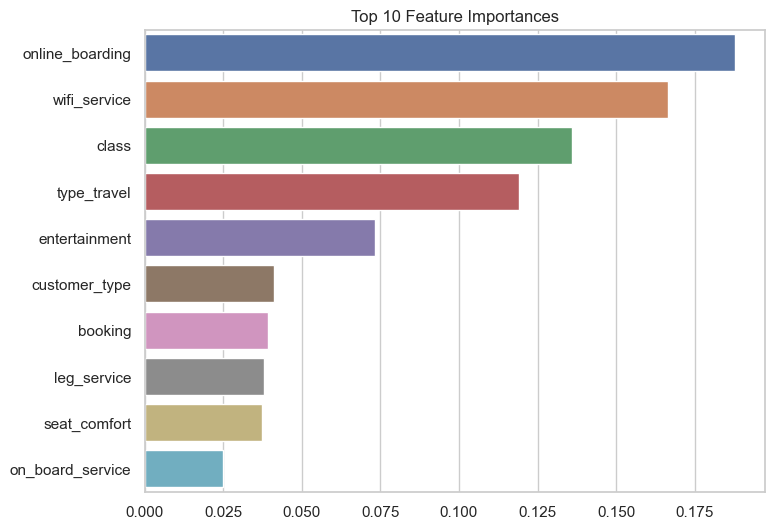

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 Feature Importance 시각화
ftr_importances_values = rf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=train_df.drop('satisfaction', axis=1).columns)
ftr_top10 = ftr_importances.sort_values(ascending=False)[:10]

plt.figure(figsize=(8,6))
plt.title('Top 10 Feature Importances')
sns.barplot(x=ftr_top10, y=ftr_top10.index)
plt.show()

In [65]:
#상위 10개 중요도를 가진 피처 선택
top_features = ftr_importances.sort_values(ascending=False).head(10).index.tolist()

#선택된 피처로 데이터셋을 구성
X_train_selected = train_df[top_features]
X_test_selected = test_df[top_features]

# 새로운 Random Forest 모델 학습
rf_selected = RandomForestClassifier(n_estimators=100, max_depth=12, min_samples_leaf=8, min_samples_split=8, random_state=11, n_jobs=-1)
rf_selected.fit(X_train_selected, y_train)

# 새로운 모델 평가
pred_selected = rf_selected.predict(X_test_selected)
print("Accuracy score of model with selected features: {0:.4f}".format(accuracy_score(y_test, pred_selected)))
print("F1 score of model with selected features: {0:.4f}".format(f1_score(y_test, pred_selected, average='macro')))

Accuracy score of model with selected features: 0.9456
F1 score of model with selected features: 0.9447


상위 10개 중요도를 가진 항목들만을 바탕으로 모델링을 시도해봤지만, 오히려 정확도가 감소하였다. 

    3. catBoosting

In [7]:
# catBoost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
  
model = CatBoostClassifier(
    verbose=False,
    learning_rate=0.23540275740381159,
    objective= 'CrossEntropy',
    colsample_bylevel= 0.09478805616996021,
    depth= 7,
    boosting_type= 'Ordered',
    bootstrap_type= 'MVS',
)

model.fit(X_train, y_train,
          eval_set=(X_test, y_test))

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'accuracny: {accuracy:.5f}')

print("classification report:\n", classification_report(y_test, y_pred))

accuracny: 0.96454
classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14573
           1       0.98      0.94      0.96     11403

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



    4. KNN (k-최근접 이웃)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# KNN 모델 생성 및 훈련
knn = KNeighborsClassifier(algorithm='brute', n_neighbors=7, metric='manhattan', weights='distance')
knn.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
knn_pred = knn.predict(X_test)

# 정확도 및 F1 점수 출력
print("{0}NN Score: {1:.4f}".format(5, accuracy_score(y_test, knn_pred)))
print("F1 score of model: {0:.4f}".format(f1_score(y_test, knn_pred, average='macro')))

5NN Score: 0.9292
F1 score of model: 0.9278


GridSearch 및 직접 하이퍼 파라미터를 수정하여 정확도를 약 0.01 정도 상승시켰다.  
또한 최종 코드에 입력하지 않았지만, PCA를 통한 차원축소를 실행한 결과, 정확도가 오히려 감소하였다.

    5. 앙상블 모델 (Soft Voting)

In [10]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#1
xgb_clf = XGBClassifier(
    learning_rate= 0.1, 
    max_depth=7,
    n_estimators=160,
    min_child_weight = 3, 
    gamma=0.1,
    reg_alpha= 0,
    reg_lambda=0.1,    
    subsample= 1.0,
    colsample_bytree= 0.8,
    scale_pos_weight= 1
)

#2
rf_clf = RandomForestClassifier(
    n_estimators =100, 
    max_depth=12,
    min_samples_leaf=8, 
    min_samples_split=8,
    random_state=11, 
    n_jobs=-1
)

#3
cb_clf = CatBoostClassifier(
    verbose=False,
    learning_rate=0.23540275740381159,
    objective= 'CrossEntropy',
    colsample_bylevel= 0.09478805616996021,
    depth= 7,
    boosting_type= 'Ordered',
    bootstrap_type= 'MVS',
)

#4
knn_clf = KNeighborsClassifier(
            n_neighbors=7, 
            metric='manhattan', 
            weights='distance'
)


voting_clf=VotingClassifier(
    estimators=[('xgb', xgb_clf), 
                ('rf', rf_clf), 
                ('knn', knn_clf), 
                ('cb', cb_clf)
                ], 
    voting='soft')

voting_clf.fit(X_train, y_train)


# 약 50초 소요

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            gpu_id=None, grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate...
                                            n_estimators=160, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=None, ...)),
                             ('rf',
                              RandomForestClassifier(max_depth=12,
                                                     min_samples_leaf=8,
                                                     min_samples_split=8,
                                                     n_jobs=-1,
                                                     random_state=11)),
                             ('knn',
                              KNeighborsClassifier(metric='manhattan',
                                                   n_neighbors=7,
                                                   weights='distance')),
                             ('cb',
                              <catboost.core.CatBoostClassifier object at 0x000001B6FA49B820>)],
                 voting='soft')

In [12]:
# 최종 모델링 및 평가
from sklearn.metrics import classification_report, accuracy_score, f1_score

y_pred=voting_clf.predict(X_test)
print("Voting Accuracy Score :{0:.5f}".format(accuracy_score(y_test,y_pred)))
print("F1 score of model : {0:.5f}".format(f1_score(y_test,y_pred,average='macro')))

Voting Accuracy Score :0.96304
F1 score of model : 0.96235


In [72]:
# submission.csv

# 밑 코드는 0: 'neutral or dissatisfied', 1: 'satisfaction' 으로 매핑해주는 코드이다. 상황에 따라 사용
# y_pred = pd.Series(y_pred).map({0: 'neutral or dissatisfied', 1: 'satisfaction'})

submission_df = pd.DataFrame({'Prediction': y_pred})

# submission.csv 저장
submission_df.to_csv('./archive/submission.csv', index=False)